In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [ ]:
import pandas as pd

data = {
    'id': [36586735, 36586736, 36586737, 36586738, 36586739],
    'start_time': [
        '2015-08-09 08:00:00+00',
        '2015-08-09 08:15:00+00',
        '2015-08-09 08:30:00+00',
        '2015-08-09 08:45:00+00',
        '2015-08-09 09:00:00+00'
    ],
    'end_time': [
        '2015-08-09 08:15:00+00',
        '2015-08-09 08:30:00+00',
        '2015-08-09 08:45:00+00',
        '2015-08-09 09:00:00+00',
        '2015-08-09 09:15:00+00'
    ],
    'measure_period': ['00:15:00', '00:15:00', '00:15:00', '00:15:00', '00:15:00'],
    'volume': [0, 0, 0, 0, 0],
    'flow_detector_id': [1903, 1903, 1903, 1903, 1903]
}

In [ ]:

td = pd.DataFrame(data)
td.to_csv('output.csv', index=False)
td = pd.read_csv('output.csv')
td.head()

,id,start_time,end_time,measure_period,volume,flow_detector_id
0,36586735,2015-08-09 08:00:00+00,2015-08-09 08:15:00+00,00:15:00,0,1903
1,36586736,2015-08-09 08:15:00+00,2015-08-09 08:30:00+00,00:15:00,0,1903
2,36586737,2015-08-09 08:30:00+00,2015-08-09 08:45:00+00,00:15:00,0,1903
3,36586738,2015-08-09 08:45:00+00,2015-08-09 09:00:00+00,00:15:00,0,1903
4,36586739,2015-08-09 09:00:00+00,2015-08-09 09:15:00+00,00:15:00,0,1903


In [ ]:
td.tail()

,id,start_time,end_time,measure_period,volume,flow_detector_id
0,36586735,2015-08-09 08:00:00+00,2015-08-09 08:15:00+00,00:15:00,0,1903
1,36586736,2015-08-09 08:15:00+00,2015-08-09 08:30:00+00,00:15:00,0,1903
2,36586737,2015-08-09 08:30:00+00,2015-08-09 08:45:00+00,00:15:00,0,1903
3,36586738,2015-08-09 08:45:00+00,2015-08-09 09:00:00+00,00:15:00,0,1903
4,36586739,2015-08-09 09:00:00+00,2015-08-09 09:15:00+00,00:15:00,0,1903


In [ ]:
dif = pd.to_datetime(td['end_time']) - pd.to_datetime(td['start_time'])
(dif == dif[0]).all()

True

In [ ]:

td = td.rename(columns={'start_time':'time'}).drop(columns=['end_time','measure_period', 'id'])

In [ ]:
data = {
    0: ['detector_description', 'flow_detector_id', 'detector_make', 'detector_name', 'facility_description'],
    1: ['Inbound towards East', 1903, 'EcoCounter', 'Tilikum Crossing 1 EB', 'South bike lane of Tilikum Crossing Bridge'],
    2: ['Inbound towards West', 1904, 'EcoCounter', 'Tilikum Crossing (EAST)', 'North bike lane of Tilikum Crossing Bridge'],
    3: ['Inbound towards West', 1905, 'EcoCounter', 'Tilikum Crossing 2 WB', 'North bike lane of Tilikum Crossing Bridge']
}

tm = pd.DataFrame(data)
tm.to_csv('output.csv', index=False, header=False)

tm = pd.read_csv('output.csv', header=None)
tm.head()

,0,1,2,3
0,detector_description,Inbound towards East,Inbound towards West,Inbound towards West
1,flow_detector_id,1903,1904,1905
2,detector_make,EcoCounter,EcoCounter,EcoCounter
3,detector_name,Tilikum Crossing 1 EB,Tilikum Crossing (EAST),Tilikum Crossing 2 WB
4,facility_description,South bike lane of Tilikum Crossing Bridge,North bike lane of Tilikum Crossing Bridge,North bike lane of Tilikum Crossing Bridge


In [ ]:
(td.flow_detector_id==1904).sum()

0

In [ ]:

tE = td.loc[td['flow_detector_id']==1903, ['time', 'volume']]
tE.index = pd.DatetimeIndex(pd.to_datetime(tE['time'])).tz_convert('US/Pacific')
tE = tE.drop(columns=['time']).rename(columns={'volume':'Eastbound'})

In [ ]:

tW = td.loc[td['flow_detector_id'] == 1905, ['time', 'volume']]
tW['time'] = pd.to_datetime(tW['time'])
tW['time'] = tW['time'].dt.tz_localize('UTC')
tW['time'] = tW['time'].dt.tz_convert('US/Pacific')
tW.set_index('time', inplace=False)
tW = tW.rename(columns={'volume': 'Westbound'})

<Axes: xlabel='time'>

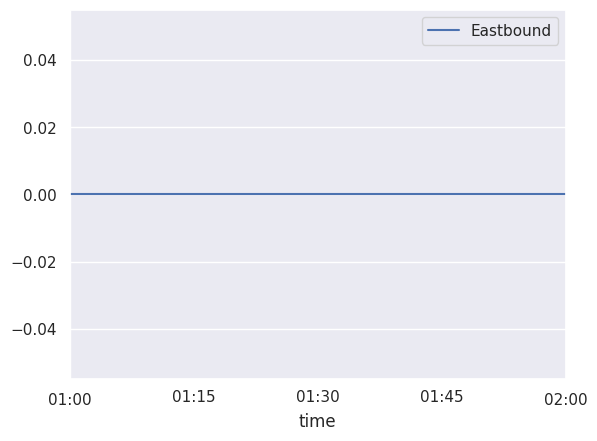

In [ ]:
tE.plot()

<Axes: xlabel='time'>

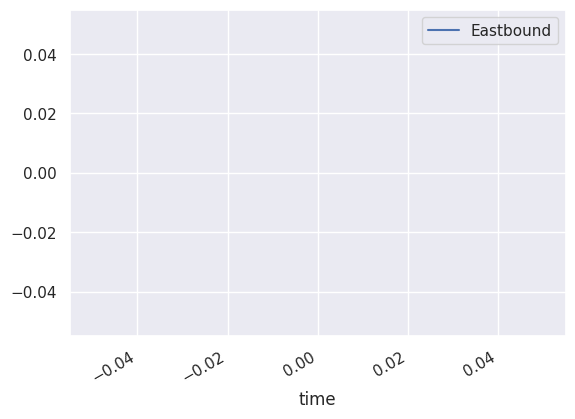

In [ ]:
tE['2018-11-25':'2019-06-01'].plot()

In [ ]:
tE['2018-11-25':'2019-06-01'] = np.nan

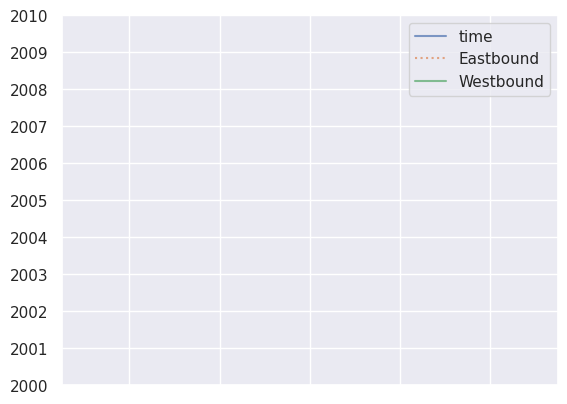

In [ ]:

t = pd.merge(tE, tW, on='time')
t.plot(alpha=0.7, style=['-',':']);

In [ ]:

import os
import shutil
import urllib

In [ ]:
url = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"
f = "C:/Users/saika/Fremont_Bridge_Bicycle_Counter.csv"

In [ ]:
# Create directory if it doesn't exist
os.makedirs(os.path.dirname(f), exist_ok=True)

# Download the file if it doesn't exist
if not os.path.exists(f):
    with urllib.request.urlopen(url) as response, open(f, 'wb') as out_file:
        shutil.copyfileobj(response, out_file)